# 1/ Etude de cas pratiques

## Etude sur données synthétiques

In [1]:
# Classification Project: Sonar rocks or mines

# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



# Spiral

### Descriptive statistics


(312, 3)
0    float64
1    float64
2      int64
dtype: object
        0     1  2
0   31.95  7.95  3
1   31.15  7.30  3
2   30.45  6.65  3
3   29.70  6.00  3
4   28.90  5.55  3
5   28.05  5.00  3
6   27.20  4.55  3
7   26.35  4.15  3
8   25.40  3.85  3
9   24.60  3.60  3
10  23.60  3.30  3
11  22.75  3.15  3
12  21.85  3.05  3
13  20.90  3.00  3
14  20.00  2.90  3
15  19.10  3.00  3
16  18.20  3.20  3
17  17.30  3.25  3
18  16.55  3.50  3
19  15.70  3.70  3
             0        1        2
count  312.000  312.000  312.000
mean    18.408   16.345    2.016
std      7.300    6.867    0.816
min      3.000    2.900    1.000
25%     12.912   11.337    1.000
50%     18.325   16.050    2.000
75%     23.400   21.363    3.000
max     31.950   31.650    3.000


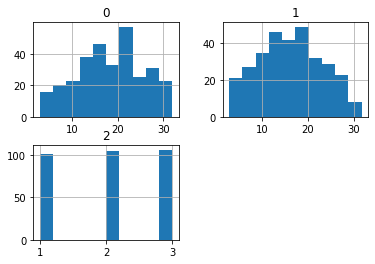

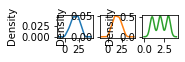

In [2]:

# Load dataset
url = 'spiral.txt'
dataset = read_csv(url, sep="\t", header=None)
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


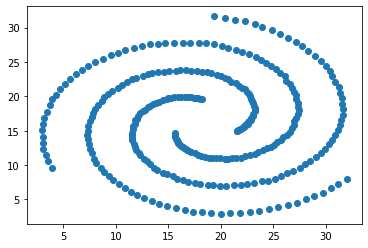

In [3]:
#nuage de points
x=dataset[0]
y=dataset[1]
size = [100,500,100,500,100,500,100,500]
pyplot.scatter(x,y)
pyplot.show()

### Scatter plot matrix & correlation matrix


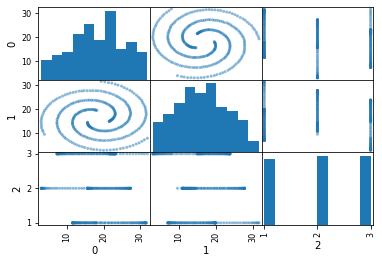

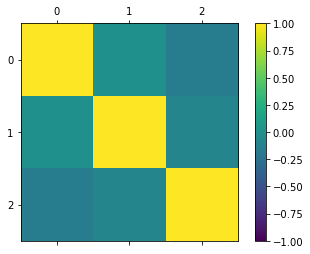

In [4]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


### Prepare Data
### Split-out validation dataset


In [5]:
array = dataset.values
X = array[:,:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


### Evaluate Algorithms
### Test options and evaluation metric

In [6]:
num_folds = 10
seed = 7
#scoring = 'accuracy'
#scoring=make_scorer(f1_score, average='weighted', labels=[2])

### Spot Check Algorithms

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

----------------------------------------
this is  accuracy  scoring
----------------------------------------
LR: 0.329000 (0.076479)
LDA: 0.329000 (0.076479)
KNN: 0.996000 (0.012000)
CART: 0.992000 (0.016000)
NB: 0.325167 (0.074119)
SVM: 0.939667 (0.048315)
----------------------------------------
this is  make_scorer(f1_score, average=weighted, labels=[2])  scoring
----------------------------------------
LR: 0.284079 (0.109085)
LDA: 0.284079 (0.109085)
KNN: 1.000000 (0.000000)
CART: 0.987045 (0.026474)
NB: 0.304243 (0.124307)
SVM: 0.927183 (0.065681)


### Compare Algorithms

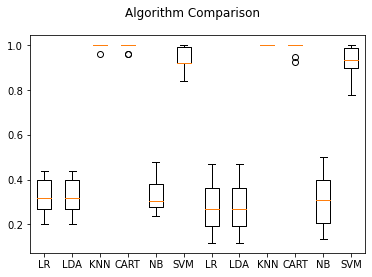

In [8]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Interprétation des résultats:


### Standardize the dataset

In [9]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
resu = []
names = []
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]
for i in scoring :
    print("----------------------------------------")
    print("this is ",i," scoring")
    print("----------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_res = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        resu.append(cv_res)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_res.mean(), cv_res.std())
        print(msg)


----------------------------------------
this is  accuracy  scoring
----------------------------------------
ScaledLR: 0.329000 (0.076479)
ScaledLDA: 0.329000 (0.076479)
ScaledKNN: 0.996000 (0.012000)
ScaledCART: 0.996000 (0.012000)
ScaledNB: 0.325167 (0.074119)
ScaledSVM: 0.939667 (0.048315)
----------------------------------------
this is  make_scorer(f1_score, average=weighted, labels=[2])  scoring
----------------------------------------
ScaledLR: 0.284079 (0.109085)
ScaledLDA: 0.284079 (0.109085)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 0.992308 (0.023077)
ScaledNB: 0.304243 (0.124307)
ScaledSVM: 0.927183 (0.065681)


### Compare Algorithms

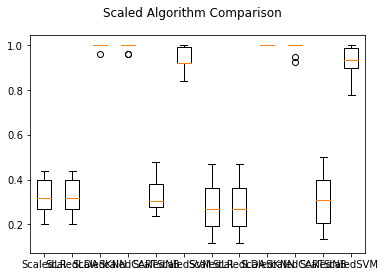

In [10]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


### Tune scaled KNN

In [11]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
0.996000 (0.012000) with: {'n_neighbors': 5}
0.988000 (0.018330) with: {'n_neighbors': 7}
0.967833 (0.046679) with: {'n_neighbors': 9}
0.959833 (0.047331) with: {'n_neighbors': 11}
0.935833 (0.062420) with: {'n_neighbors': 13}
0.923833 (0.072472) with: {'n_neighbors': 15}
0.895833 (0.101405) with: {'n_neighbors': 17}
0.827833 (0.105699) with: {'n_neighbors': 19}
0.799667 (0.097576) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
0.986667 (0.026667) with: {

### Tune scaled SVM

In [12]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.980000 using {'C': 2.0, 'kernel': 'rbf'}
0.333000 (0.068125) with: {'C': 0.1, 'kernel': 'linear'}
0.417167 (0.080492) with: {'C': 0.1, 'kernel': 'poly'}
0.260833 (0.102695) with: {'C': 0.1, 'kernel': 'rbf'}
0.337167 (0.079659) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.337000 (0.068418) with: {'C': 0.3, 'kernel': 'linear'}
0.401167 (0.059768) with: {'C': 0.3, 'kernel': 'poly'}
0.683167 (0.111521) with: {'C': 0.3, 'kernel': 'rbf'}
0.341167 (0.108592) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.337000 (0.068418) with: {'C': 0.5, 'kernel': 'linear'}
0.401333 (0.054797) with: {'C': 0.5, 'kernel': 'poly'}
0.887333 (0.062000) with: {'C': 0.5, 'kernel': 'rbf'}
0.248833 (0.070585) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.337000 (0.068418) with: {'C': 0.7, 'kernel': 'linear'}
0.405333 (0.061449) with: {'C': 0.7, 'kernel': 'poly'}
0.923667 (0.055024) with: {'C': 0.7, 'kernel': 'rbf'}
0.1966

In [13]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.795000 (0.081394)
GBM: 0.972000 (0.031241)
RF: 0.984000 (0.019596)
ET: 1.000000 (0.000000)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
AB: 0.748787 (0.139515)
GBM: 0.962030 (0.048903)
RF: 0.974530 (0.040274)
ET: 1.000000 (0.000000)


### Compare Algorithms

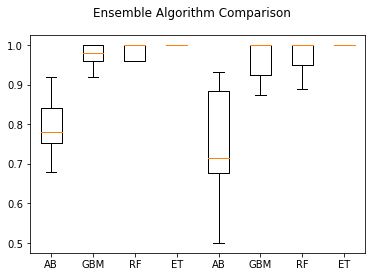

In [14]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



### Finalize Model


In [15]:
### prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9523809523809523
[[17  0  0]
 [ 0 21  0]
 [ 0  3 22]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        17
         2.0       0.88      1.00      0.93        21
         3.0       1.00      0.88      0.94        25

    accuracy                           0.95        63
   macro avg       0.96      0.96      0.96        63
weighted avg       0.96      0.95      0.95        63



# Aggregation 

### Descriptive statistics

(788, 3)
0    float64
1    float64
2      int64
dtype: object
        0      1  2
0   15.55  28.65  2
1   14.90  27.55  2
2   14.45  28.35  2
3   14.15  28.80  2
4   13.75  28.05  2
5   13.35  28.45  2
6   13.00  29.15  2
7   13.45  27.50  2
8   13.60  26.50  2
9   12.80  27.35  2
10  12.40  27.85  2
11  12.30  28.40  2
12  12.20  28.65  2
13  13.40  25.10  2
14  12.95  25.95  2
15  12.90  26.50  2
16  11.85  27.00  2
17  11.35  28.00  2
18  11.15  28.70  2
19  11.25  27.40  2
             0        1        2
count  788.000  788.000  788.000
mean    19.567   14.172    3.770
std      9.922    8.090    1.596
min      3.350    1.950    1.000
25%     11.150    7.037    2.000
50%     18.225   11.725    4.000
75%     30.700   21.962    5.000
max     36.550   29.150    7.000


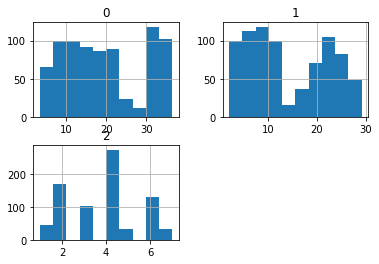

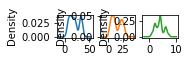

In [16]:

# Load dataset
url = 'Aggregation.txt'
dataset = read_csv(url, sep="\t", header=None)
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


### Scatter plot matrix & correlation matrix

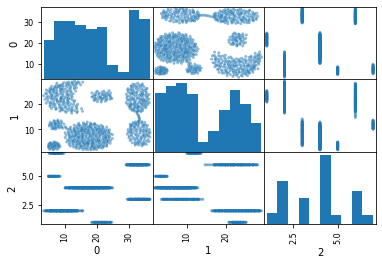

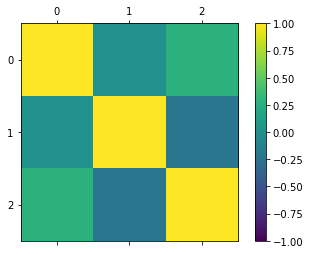

In [17]:

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


### Prepare Data
### Split-out validation dataset

In [18]:
array = dataset.values
X = array[:,:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms
### Test options and evaluation metric

In [19]:
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]

### Spot Check Algorithms

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------


C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.977778 (0.023757)
LDA: 0.993651 (0.014548)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.998413 (0.004762)
SVM: 0.998413 (0.004762)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------


C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moham\anaconda3\envs\Data2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.975177 (0.031663)
LDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


### Compare Algorithms

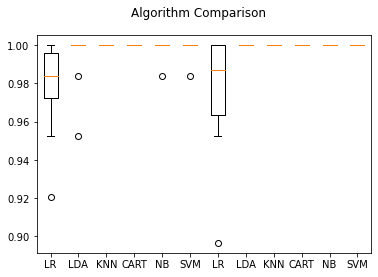

In [21]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Standardize the dataset

In [22]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
ScaledLR: 0.992063 (0.010648)
ScaledLDA: 0.993651 (0.014548)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 0.998413 (0.004762)
ScaledSVM: 0.998413 (0.004762)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
ScaledLR: 0.996552 (0.010345)
ScaledLDA: 1.000000 (0.000000)
ScaledKNN: 1.000000 (0.000000)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 1.000000 (0.000000)
ScaledSVM: 1.000000 (0.000000)


### Compare Algorithms

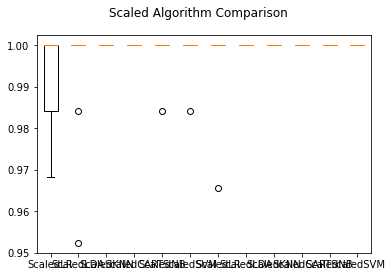

In [23]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


### Tune scaled KNN

In [24]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 5}
0.996825 (0.006349) with: {'n_neighbors': 1}
0.998413 (0.004762) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
0.996825 (0.006349) with: {'n_neighbors': 7}
0.996825 (0.006349) with: {'n_neighbors': 9}
0.996825 (0.006349) with: {'n_neighbors': 11}
0.996825 (0.006349) with: {'n_neighbors': 13}
0.996825 (0.006349) with: {'n_neighbors': 15}
0.996825 (0.006349) with: {'n_neighbors': 17}
0.996825 (0.006349) with: {'n_neighbors': 19}
0.996825 (0.006349) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 3}
1.000000 (0.000000) with: {'n_neighbors': 5}
1.000000 (0.000000) with: {

In [25]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.998413 using {'C': 0.3, 'kernel': 'linear'}
0.960317 (0.026797) with: {'C': 0.1, 'kernel': 'linear'}
0.890476 (0.050420) with: {'C': 0.1, 'kernel': 'poly'}
0.933333 (0.025397) with: {'C': 0.1, 'kernel': 'rbf'}
0.860317 (0.047513) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.998413 (0.004762) with: {'C': 0.3, 'kernel': 'linear'}
0.955556 (0.018511) with: {'C': 0.3, 'kernel': 'poly'}
0.998413 (0.004762) with: {'C': 0.3, 'kernel': 'rbf'}
0.900000 (0.038260) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.998413 (0.004762) with: {'C': 0.5, 'kernel': 'linear'}
0.969841 (0.016572) with: {'C': 0.5, 'kernel': 'poly'}
0.998413 (0.004762) with: {'C': 0.5, 'kernel': 'rbf'}
0.922222 (0.032877) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.998413 (0.004762) with: {'C': 0.7, 'kernel': 'linear'}
0.976190 (0.016265) with: {'C': 0.7, 'kernel': 'poly'}
0.998413 (0.004762) with: {'C': 0.7, 'kernel': 'rbf'}
0.9

In [26]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.907937 (0.041270)
GBM: 0.990476 (0.007776)
RF: 0.998413 (0.004762)
ET: 0.996825 (0.006349)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
AB: 0.889617 (0.056443)
GBM: 0.996296 (0.011111)
RF: 1.000000 (0.000000)
ET: 1.000000 (0.000000)


### Compare Algorithms

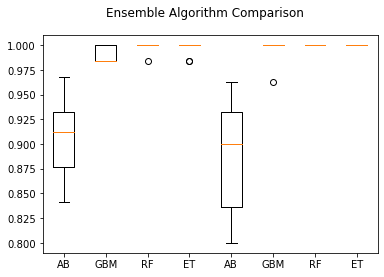

In [27]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Finalize Model
### prepare the model

In [28]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9936708860759493
[[11  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 57  0  0  1]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        31
         3.0       1.00      1.00      1.00        20
         4.0       1.00      0.98      0.99        58
         5.0       1.00      1.00      1.00        12
         6.0       1.00      1.00      1.00        23
         7.0       0.75      1.00      0.86         3

    accuracy                           0.99       158
   macro avg       0.96      1.00      0.98       158
weighted avg       1.00      0.99      0.99       158



# Flame 

### Descriptive statistics

(240, 3)
0    float64
1    float64
2      int64
dtype: object
       0      1  2
0   1.85  27.80  1
1   1.35  26.65  1
2   1.40  23.25  2
3   0.85  23.05  2
4   0.50  22.35  2
5   0.65  21.35  2
6   1.10  22.05  2
7   1.35  22.65  2
8   1.95  22.80  2
9   2.40  22.45  2
10  1.80  22.00  2
11  2.50  21.85  2
12  2.95  21.40  2
13  1.90  21.25  2
14  1.35  21.45  2
15  1.35  20.90  2
16  1.25  20.35  2
17  1.75  20.05  2
18  2.00  20.60  2
19  2.50  21.00  2
             0        1        2
count  240.000  240.000  240.000
mean     7.324   20.929    1.637
std      3.203    3.383    0.482
min      0.500   14.450    1.000
25%      5.250   18.238    1.000
50%      7.300   20.775    2.000
75%      9.312   23.562    2.000
max     14.200   27.800    2.000


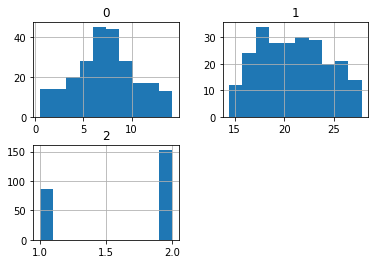

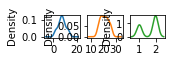

In [29]:
# Load dataset
url = 'flame.txt'
dataset = read_csv(url, sep="\t", header=None)
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#pyplot.show()


### Scatter plot matrix & correlation matrix

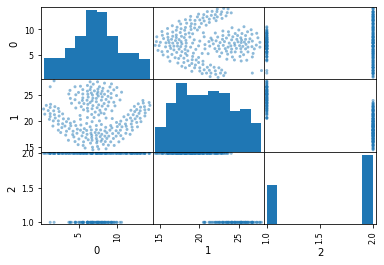

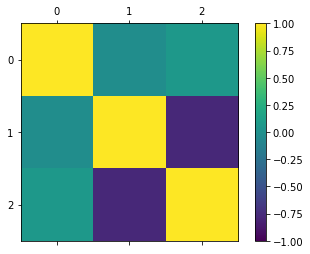

In [30]:
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


### Prepare Data
### Split-out validation dataset

In [31]:
array = dataset.values
X = array[:,:2].astype(float)
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms
### Test options and evaluation metric

In [32]:
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted', labels=[2])]

### Spot Check Algorithms

In [33]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
LR: 0.895263 (0.041456)
LDA: 0.890000 (0.044423)
KNN: 0.984211 (0.024119)
CART: 0.984211 (0.024119)
NB: 0.958158 (0.039323)
SVM: 0.978947 (0.025784)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
LR: 0.914170 (0.034881)
LDA: 0.909460 (0.037321)
KNN: 0.986025 (0.021855)
CART: 0.985474 (0.022428)
NB: 0.963389 (0.038721)
SVM: 0.983585 (0.020582)


### Compare Algorithms

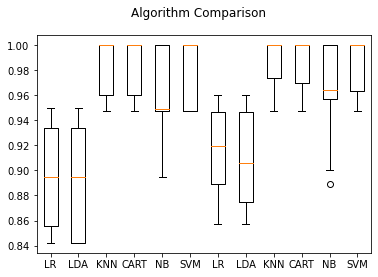

In [34]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Standardize the dataset

In [35]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


--------------------------------------------
accuracy scoring
--------------------------------------------
ScaledLR: 0.885000 (0.039980)
ScaledLDA: 0.890000 (0.044423)
ScaledKNN: 0.984211 (0.024119)
ScaledCART: 0.984211 (0.024119)
ScaledNB: 0.958158 (0.039323)
ScaledSVM: 0.989474 (0.021053)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
ScaledLR: 0.905800 (0.037416)
ScaledLDA: 0.909460 (0.037321)
ScaledKNN: 0.986025 (0.021855)
ScaledCART: 0.985474 (0.022428)
ScaledNB: 0.963389 (0.038721)
ScaledSVM: 0.991289 (0.017889)


### Compare Algorithms

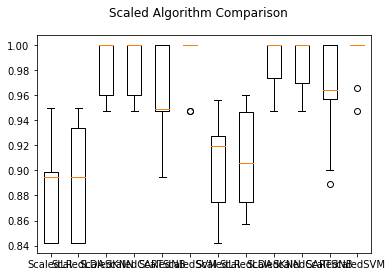

In [36]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Tune scaled KNN

In [37]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.995000 using {'n_neighbors': 1}
0.995000 (0.015000) with: {'n_neighbors': 1}
0.989474 (0.021053) with: {'n_neighbors': 3}
0.984211 (0.024119) with: {'n_neighbors': 5}
0.984211 (0.024119) with: {'n_neighbors': 7}
0.989474 (0.021053) with: {'n_neighbors': 9}
0.989474 (0.021053) with: {'n_neighbors': 11}
0.994737 (0.015789) with: {'n_neighbors': 13}
0.984211 (0.024119) with: {'n_neighbors': 15}
0.984211 (0.024119) with: {'n_neighbors': 17}
0.989474 (0.021053) with: {'n_neighbors': 19}
0.989474 (0.021053) with: {'n_neighbors': 21}
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
Best: 0.995238 using {'n_neighbors': 1}
0.995238 (0.014286) with: {'n_neighbors': 1}
0.989474 (0.021053) with: {'n_neighbors': 3}
0.986025 (0.021855) with: {'n_neighbors': 5}
0.986025 (0.021855) with: {

### Tune scaled SVM

In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=i, cv=kfold)
    grid_result = grid.fit(rescaledX, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

--------------------------------------------
accuracy scoring
--------------------------------------------
Best: 0.989474 using {'C': 1.0, 'kernel': 'rbf'}
0.885263 (0.039722) with: {'C': 0.1, 'kernel': 'linear'}
0.797632 (0.120964) with: {'C': 0.1, 'kernel': 'poly'}
0.973684 (0.035306) with: {'C': 0.1, 'kernel': 'rbf'}
0.890263 (0.037366) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.885263 (0.039722) with: {'C': 0.3, 'kernel': 'linear'}
0.818684 (0.105240) with: {'C': 0.3, 'kernel': 'poly'}
0.984211 (0.024119) with: {'C': 0.3, 'kernel': 'rbf'}
0.875000 (0.034618) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.885263 (0.039722) with: {'C': 0.5, 'kernel': 'linear'}
0.828684 (0.097988) with: {'C': 0.5, 'kernel': 'poly'}
0.984211 (0.024119) with: {'C': 0.5, 'kernel': 'rbf'}
0.869737 (0.035213) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.885263 (0.039722) with: {'C': 0.7, 'kernel': 'linear'}
0.833947 (0.099962) with: {'C': 0.7, 'kernel': 'poly'}
0.978947 (0.025784) with: {'C': 0.7, 'kernel': 'rbf'}
0.8644

In [39]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
AB: 0.968684 (0.034762)
GBM: 0.979211 (0.025472)
RF: 0.989474 (0.021053)
ET: 0.994737 (0.015789)
--------------------------------------------
make_scorer(f1_score, average=weighted, labels=[2]) scoring
--------------------------------------------
AB: 0.970153 (0.032010)
GBM: 0.981126 (0.023384)
RF: 0.989474 (0.021053)
ET: 0.989474 (0.021053)


### Compare Algorithms

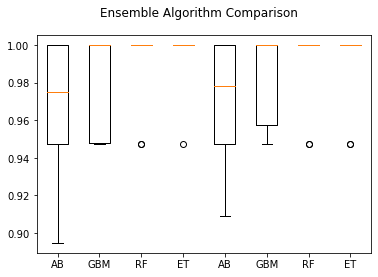

In [40]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



### Finalize Model
### prepare the model

In [41]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[13  0]
 [ 0 35]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



# 2/ Etude de cas pratiques

### (clients d’une banque, transactions bancaires)

In [42]:
# Load dataset
url = 'creditcard.csv'
dataset = read_csv(url)
dataset.info()

# Summarize Data
#dataset
# histograms
#df.hist()
#pyplot.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

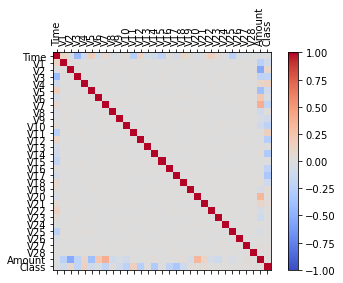

----------------


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()
print("----------------")
#etude de la correlation
# matrice_corr = dataset.corr().round(1)
# sns.heatmap(data=matrice_corr, annot=True)
# plt.savefig('fig2.png')

In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np
# # Split-out validation dataset
array = dataset.values
X = array[:,:30].astype(float)
print(type(X))
Y = array[:,30]
reg = LinearRegression().fit(X, Y)
reg.score(X,Y)
print(reg.coef_)
li = []
for i in reg.coef_:
    li.append(abs(i))
index = []
for i in range(0,30):
    index.append(i)
print(index)
resultat = [[note, nom] for note, nom in zip(li, index)]
li.sort()
li =li[0:10]
ind=[]
for i in li:
    for j in resultat:
        if i == j[0]:
            ind.append(j[1])
sup = []
for i in range(0,30):
    if i not in ind:
        sup.append(i)
print(sup)
print("-------------------------")
print(ind)
print("------------------")
print(X.shape[1])
print("------------------")
X_new = np.delete(X,sup,1)
print("------------------")
X_new.shape[1]
X =X_new

<class 'numpy.ndarray'>
[-4.39426334e-09 -1.92862035e-03  2.86900915e-03 -5.09422397e-03
  3.77396705e-03 -2.33149107e-03 -1.65970556e-03 -6.84506821e-03
  8.38699133e-04 -3.62393138e-03 -8.09929073e-03  6.25021700e-03
 -1.07873207e-02 -2.13985211e-04 -1.31908206e-02 -2.27611848e-04
 -9.30353028e-03 -1.59962257e-02 -5.57693390e-03  1.90500163e-03
  2.82324488e-04  2.03985251e-03  2.46947758e-04  1.60584609e-04
 -5.15860934e-04  3.34058231e-04  3.77638890e-04  1.67849544e-03
  1.13827037e-03  7.13885807e-06]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 21, 27, 28]
-------------------------
[0, 29, 23, 13, 15, 22, 20, 25, 26, 24]
------------------
30
------------------
------------------


# Data balancing

In [45]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [46]:
from sklearn.utils import resample
import pandas as pd
df_majority = dataset[dataset.Class==0]
df_minority = dataset[dataset.Class==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
dataset = pd.concat([df_majority, df_minority_upsampled])
dataset['Class'].value_counts()


0    284315
1    284315
Name: Class, dtype: int64

In [52]:
### Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,:30].astype(float)
X_new = np.delete(X,sup,1)
X = X_new
Y = array[:,30]
validation_size = 0.01
seed = 7
#train_size = 0.06
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size,random_state=seed)



In [53]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring =['accuracy',make_scorer(f1_score, average='weighted')]

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for i in scoring :
    print("--------------------------------------------")
    print(i,"scoring")
    print("--------------------------------------------")
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=i)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

--------------------------------------------
accuracy scoring
--------------------------------------------
LR: 0.548443 (0.000885)
LDA: 0.615229 (0.003439)


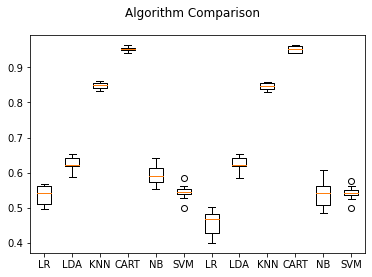

In [202]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [203]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ValueError: For evaluating multiple scores, use sklearn.model_selection.cross_validate instead. ['accuracy', make_scorer(f1_score, average=weighted)] was passed.

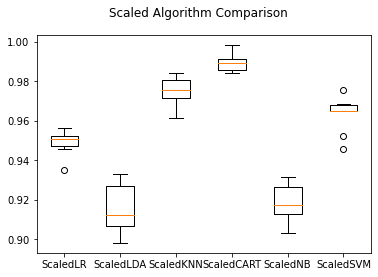

In [49]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [50]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988744 using {'n_neighbors': 1}
0.988744 (0.003354) with: {'n_neighbors': 1}
0.983820 (0.004770) with: {'n_neighbors': 3}
0.975554 (0.006602) with: {'n_neighbors': 5}
0.967463 (0.008224) with: {'n_neighbors': 7}
0.957615 (0.009553) with: {'n_neighbors': 9}
0.946358 (0.011220) with: {'n_neighbors': 11}
0.942489 (0.011517) with: {'n_neighbors': 13}
0.945656 (0.009748) with: {'n_neighbors': 15}
0.944600 (0.010911) with: {'n_neighbors': 17}
0.939675 (0.007049) with: {'n_neighbors': 19}
0.935982 (0.008341) with: {'n_neighbors': 21}


In [51]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.970630 (0.003340)
GBM: 0.986457 (0.003343)
RF: 0.997362 (0.001622)
ET: 0.998417 (0.001837)


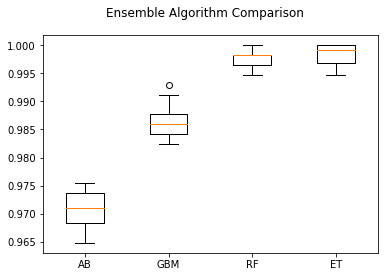

In [52]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [53]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9692280640056269
[[2865   31]
 [ 144 2647]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2896
         1.0       0.99      0.95      0.97      2791

    accuracy                           0.97      5687
   macro avg       0.97      0.97      0.97      5687
weighted avg       0.97      0.97      0.97      5687



# Visa premier

### Chargement des données 

In [54]:
# Load dataset
import numpy as np
from sklearn.linear_model import LinearRegression
url = 'VisaPremier.txt'
dataset = read_csv(url,sep='\t')

#Description
#dataset.info()
#dataset['cartevpr'].value_counts()

###  Nettoyage des données  


In [55]:
# Nettoyage des données  

#sexe  :
dataset['sexe'] = [1 if b=='Shom' else 0 for b in dataset.sexe]

#sitfamil :
ind = np.where(dataset['sitfamil'] == "F.")
for i in ind:
    inde= list(i)

dataset['sitfamil'] = [1 if a=="Fmar" else 2 if a=="Fcel" else 3 if a=="Fdiv" else 4 if a=="Fuli" else 5 if a=="Fsep" else 6 if a=="Fveu" else 'F.' for a in dataset.sitfamil]

#Departem :
ind = np.where(dataset['departem'] == ".")
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)

#csp
dataset['csp'] = [1 if a=="Pcad" else 2 if a=="Pemp" else 3 if a=="Psan" else 4 if a=="Pouv" else 5 if a=="Part" else 6 if a=="Pret" else 7 if a=="Pinc" else 8 for a in dataset.csp]

#codeqlt
ind = np.where(dataset['codeqlt'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)

dataset['codeqlt'] = [1 if a=="A" else 2 if a=="B" else 3 if a=="C" else 4 if a=="D" else 5 if a=="E" else 6  for a in dataset.codeqlt]

#agemvt
ind = np.where(dataset['agemvt'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)
        
#nbpaiecb      
ind = np.where(dataset['nbpaiecb'] == '.')
for i in ind: 
    tmp= list(i) 
for i in tmp: 
    if i not in inde:
        inde.append(i)
        

#Suppression des ROWs 
inde.sort()
for i in inde:
    dataset = dataset.drop(i,axis=0)

#Suppression de la colonne dupliquée cartevp & cartevpr
dataset = dataset.drop(['cartevp'],axis=1,errors='ignore')


In [56]:
    
dataset.to_csv('CleanDataSet.txt',sep='\t')
url = 'CleanDataSet.txt'
dataset = read_csv(url,sep='\t')
#Verification
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  722 non-null    int64
 1   matricul    722 non-null    int64
 2   departem    722 non-null    int64
 3   ptvente     722 non-null    int64
 4   sexe        722 non-null    int64
 5   age         722 non-null    int64
 6   sitfamil    722 non-null    int64
 7   anciente    722 non-null    int64
 8   csp         722 non-null    int64
 9   codeqlt     722 non-null    int64
 10  nbimpaye    722 non-null    int64
 11  mtrejet     722 non-null    int64
 12  nbopguic    722 non-null    int64
 13  moycred3    722 non-null    int64
 14  aveparmo    722 non-null    int64
 15  endette     722 non-null    int64
 16  engagemt    722 non-null    int64
 17  engagemc    722 non-null    int64
 18  engagemm    722 non-null    int64
 19  nbcptvue    722 non-null    int64
 20  moysold3    722 non-null    int6

In [59]:
### Prepare Data

# Split-out validation dataset
array = dataset.values
#X = array[:,:].astype(float)
Y = array[:,46]
dataset1 = dataset.drop(['cartevpr'],axis=1,errors='ignore')
array = dataset1.values
X = array[:,:].astype(float)
reg = LinearRegression(normalize=True).fit(X, Y)
#print(reg.score(X, Y))
#l=list(reg.coef_)
li=[]
lii=[]
for i in l:
    li.append(abs(i))
    lii.append(abs(i))
li.sort()
li=li[-10:]
print(li)
#print(l.sort()) 
#print(l)
ind=[]
for i in li:
    ind.append(lii.index(i))
print(ind)
for i in range(1,48):
    print(ind.count(i))
    print(i,"heda i")
    if(ind.count(i)==0):
        dataset = dataset.drop(columns=["i"])
dataset.info()
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



[]
[]
0
1 heda i


KeyError: "['i'] not found in axis"

In [ ]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))